# Importing the essentials

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('World-happiness-report-updated_2024.csv', encoding='latin-1')

# Understanding the data

In [3]:
df.columns

Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect'],
      dtype='object')

In [4]:
df.shape

(2363, 11)

In [5]:
df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.350,0.451,50.5,0.718,0.164,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.8,0.679,0.187,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.1,0.600,0.118,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.4,0.496,0.160,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.7,0.531,0.234,0.776,0.614,0.268


In [6]:
print(df.isnull().sum())
print('-'*50)
print(df.duplicated().sum())
print('-'*50)
print(df.info())

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   28
Social support                       13
Healthy life expectancy at birth     63
Freedom to make life choices         36
Generosity                           81
Perceptions of corruption           125
Positive affect                      24
Negative affect                      16
dtype: int64
--------------------------------------------------
0
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2363 non-null   object 
 1   year                              2363 non-null   int64  
 2   Life Ladder                       2363 non-null   float64
 3   Log GDP per capi

there are a lot of null values in the data 

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,2363.0,2014.763860,5.059436,2005.000,2011.0000,2015.0000,2019.00000,2023.000
Life Ladder,2363.0,5.483566,1.125522,1.281,4.6470,5.4490,6.32350,8.019
Log GDP per capita,2335.0,9.399671,1.152069,5.527,8.5065,9.5030,10.39250,11.676
Social support,2350.0,0.809369,0.121212,0.228,0.7440,0.8345,0.90400,0.987
Healthy life expectancy at birth,2300.0,63.401828,6.842644,6.720,59.1950,65.1000,68.55250,74.600
Freedom to make life choices,2327.0,0.750282,0.139357,0.228,0.6610,0.7710,0.86200,0.985
Generosity,2282.0,0.000098,0.161388,-0.340,-0.1120,-0.0220,0.09375,0.700
Perceptions of corruption,2238.0,0.743971,0.184865,0.035,0.6870,0.7985,0.86775,0.983
Positive affect,2339.0,0.651882,0.106240,0.179,0.5720,0.6630,0.73700,0.884
Negative affect,2347.0,0.273151,0.087131,0.083,0.2090,0.2620,0.32600,0.705


In [8]:
for col in df.columns[:5]:
    print(f'{col} : {df[col].unique()}')
    print('v'*50)
    print(f'{col} : {df[col].nunique()}')
    print('-'*50)

Country name : ['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia'
 'Australia' 'Austria' 'Azerbaijan' 'Bahrain' 'Bangladesh' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia'
 'Cameroon' 'Canada' 'Central African Republic' 'Chad' 'Chile' 'China'
 'Colombia' 'Comoros' 'Congo (Brazzaville)' 'Congo (Kinshasa)'
 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Czechia' 'Denmark' 'Djibouti'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Estonia' 'Eswatini'
 'Ethiopia' 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany'
 'Ghana' 'Greece' 'Guatemala' 'Guinea' 'Guyana' 'Haiti' 'Honduras'
 'Hong Kong S.A.R. of China' 'Hungary' 'Iceland' 'India' 'Indonesia'
 'Iran' 'Iraq' 'Ireland' 'Israel' 'Italy' 'Ivory Coast' 'Jamaica' 'Japan'
 'Jordan' 'Kazakhstan' 'Kenya' 'Kosovo' 'Kuwait' 'Kyrgyzstan' 'Laos'
 'Latvia' 'Lebanon' 'Lesotho' 'Liberia' 'Libya' 'Lithuania' 'Luxembourg'
 'Madagasc

no annomalies for the wrong datatypes

## Filling the missing values

In [9]:
#  Choosing the one with the missing values
num = df.select_dtypes(include=('float64')).columns[1:]

for item in num:
    df[item] = df[item].fillna(df[item].mean())

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2363 non-null   object 
 1   year                              2363 non-null   int64  
 2   Life Ladder                       2363 non-null   float64
 3   Log GDP per capita                2363 non-null   float64
 4   Social support                    2363 non-null   float64
 5   Healthy life expectancy at birth  2363 non-null   float64
 6   Freedom to make life choices      2363 non-null   float64
 7   Generosity                        2363 non-null   float64
 8   Perceptions of corruption         2363 non-null   float64
 9   Positive affect                   2363 non-null   float64
 10  Negative affect                   2363 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 203.2+ KB


In [10]:
df.to_csv('Happiness_cleaned_data.csv')

# EDA

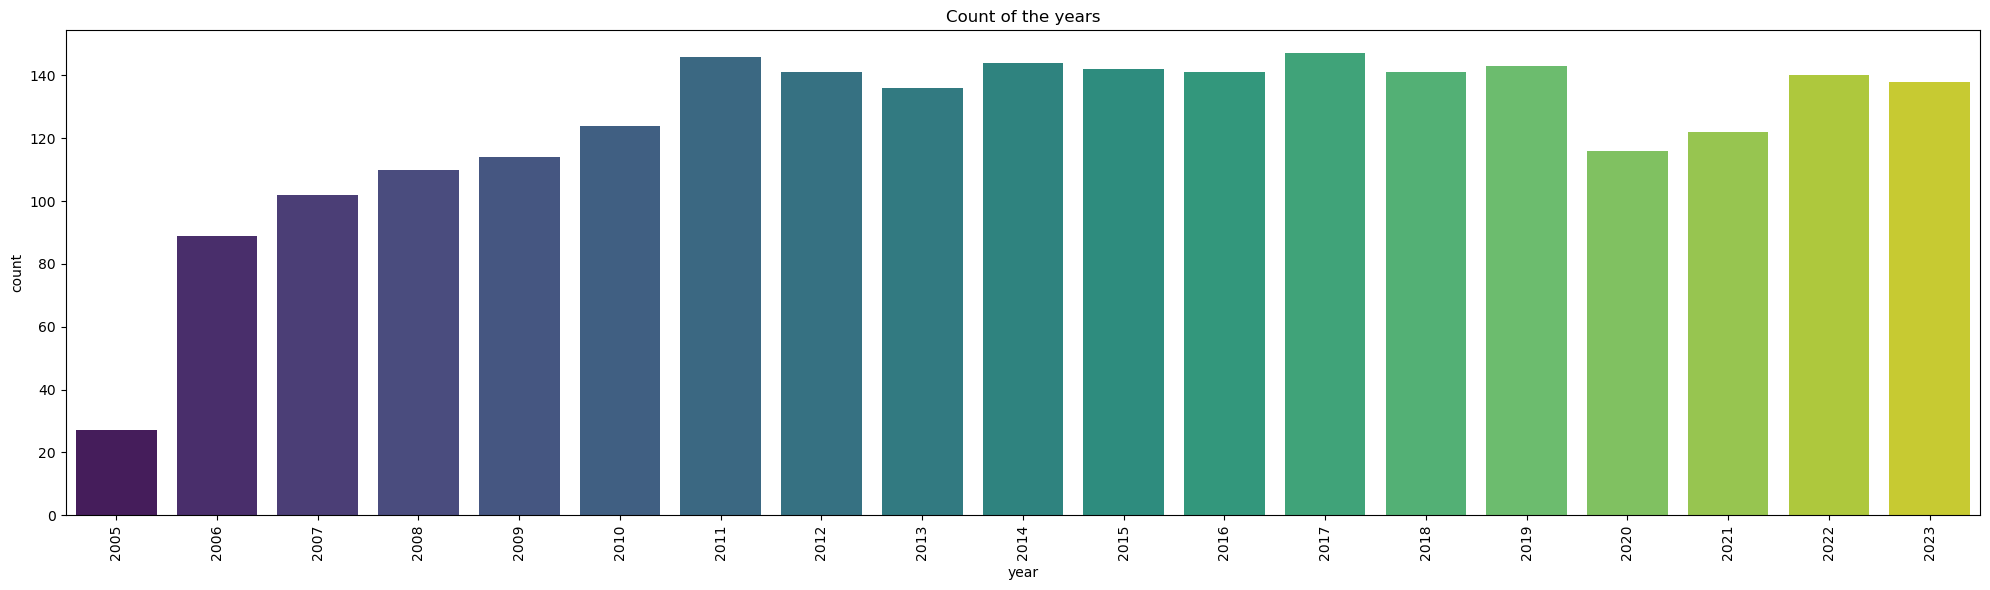

In [15]:
plt.figure(figsize=(20,6))
sns.countplot(x = "year", data =df , palette='viridis').set_title("Count of the years")
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

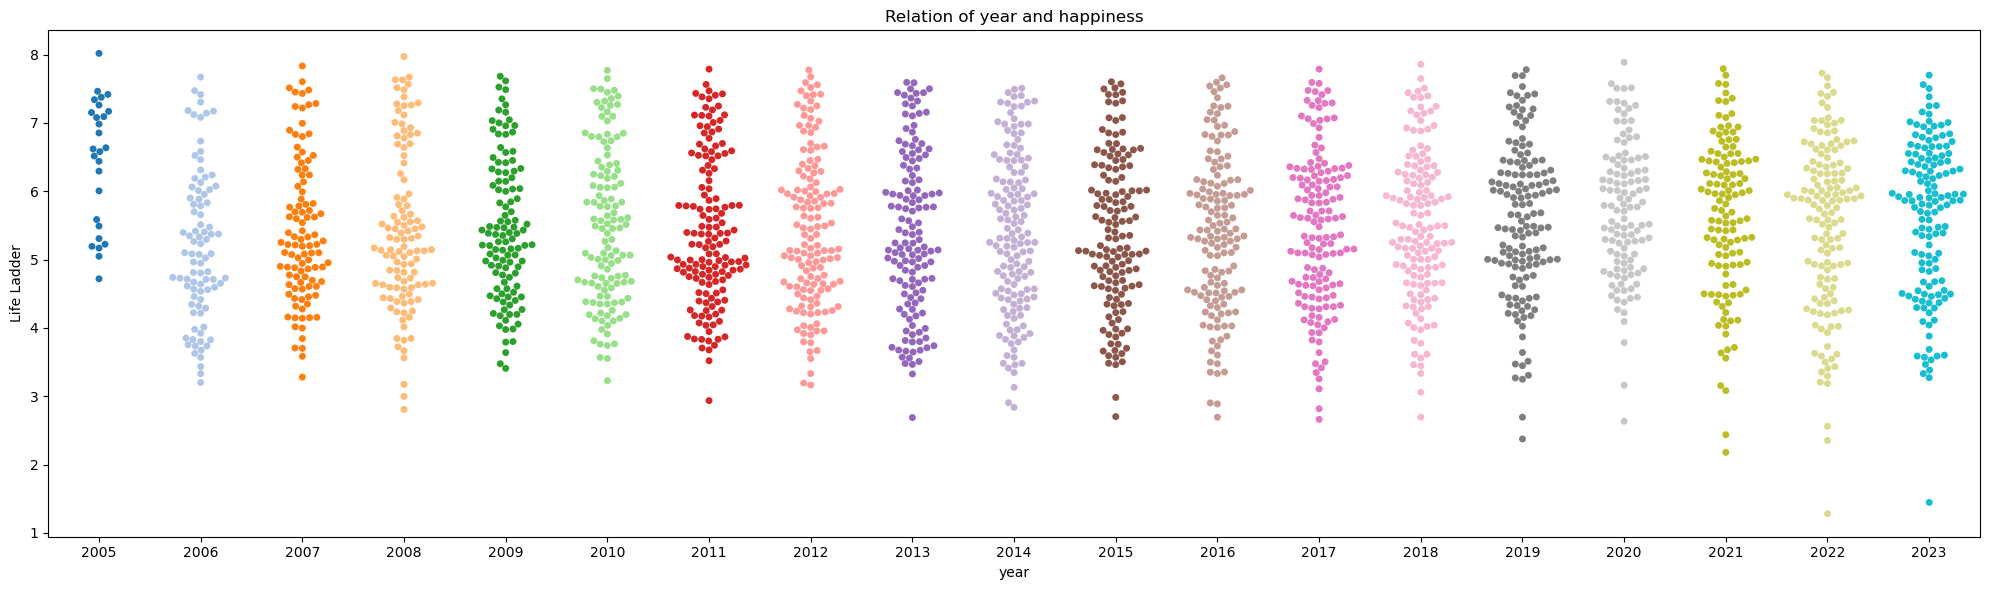

In [18]:
plt.figure(figsize=(20,6))
sns.swarmplot(x = "year", y = 'Life Ladder', data =df , palette='tab20').set_title("Relation of year and happiness")
plt.tight_layout()
plt.show()